In [1]:
"""
██████╗  █████╗ ██████╗ ███████╗██████╗     ██████╗ ██╗      ██████╗ ████████╗
██╔══██╗██╔══██╗██╔══██╗██╔════╝██╔══██╗    ██╔══██╗██║     ██╔═══██╗╚══██╔══╝
██████╔╝███████║██████╔╝█████╗  ██████╔╝    ██████╔╝██║     ██║   ██║   ██║
██╔═══╝ ██╔══██║██╔═══╝ ██╔══╝  ██╔══██╗    ██╔═══╝ ██║     ██║   ██║   ██║
██║     ██║  ██║██║     ███████╗██║  ██║    ██║     ███████╗╚██████╔╝   ██║
╚═╝     ╚═╝  ╚═╝╚═╝     ╚══════╝╚═╝  ╚═╝    ╚═╝     ╚══════╝ ╚═════╝    ╚═╝
@Title    : 混合契约下应急物资政企三级联合储备模型研究
@Author   : GUO Keting, GONG Lingjun
@Version  : 2024-03-26 (V3.0)
"""

'\n██████╗  █████╗ ██████╗ ███████╗██████╗     ██████╗ ██╗      ██████╗ ████████╗\n██╔══██╗██╔══██╗██╔══██╗██╔════╝██╔══██╗    ██╔══██╗██║     ██╔═══██╗╚══██╔══╝\n██████╔╝███████║██████╔╝█████╗  ██████╔╝    ██████╔╝██║     ██║   ██║   ██║\n██╔═══╝ ██╔══██║██╔═══╝ ██╔══╝  ██╔══██╗    ██╔═══╝ ██║     ██║   ██║   ██║\n██║     ██║  ██║██║     ███████╗██║  ██║    ██║     ███████╗╚██████╔╝   ██║\n╚═╝     ╚═╝  ╚═╝╚═╝     ╚══════╝╚═╝  ╚═╝    ╚═╝     ╚══════╝ ╚═════╝    ╚═╝\n@Title    : 混合契约下应急物资政企三级联合储备模型研究\n@Author   : GUO Keting, GONG Lingjun\n@Version  : 2024-03-26 (V3.0)\n'

In [2]:
import matplotlib as mpl  # noqa: F401
import matplotlib.pyplot as plt
import numpy as np
import scienceplots  # noqa: F401
from matplotlib.patches import Rectangle
from matplotlib.ticker import MultipleLocator, ScalarFormatter
from mpl_toolkits.mplot3d import Axes3D

# initial settings
# mpl.rcParams["svg.fonttype"] = "none"
plt.style.use(["science", "grid", "no-latex"])
%config InlineBackend.figure_format = 'svg'

In [3]:
# Grid data X, Y and meshgrid. X -> \rho, Y -> c2
X, Y = np.meshgrid(np.linspace(51 / 98, 1, 75), np.linspace(1933 / 17, 275, 75))

# Set parameter values
U, MU = 20000, 10000
H0, H1, HG = 10, 5, 12
C0, C1 = 25, 30
G0, G = 20, 25
V, S = 8, 5
O = 10  # noqa: E741
W, E, M = 150, 300, 400

In [4]:
# Calculate the values for Qg, qm, qs, Qa, and qa
Qg = U * (1 - (W + HG - V) / (X * (E - V)))
qm = U * (1 - (C1 + H0 + G0 - V - O) / (X * (Y + G - V))) - Qg
qs = U * (1 - (C0 + H1 - S) / (X * (Y - S))) - qm - Qg
Qa = U * (1 - (W + HG - V) / (X * (E - V)))
qa = U * (1 - (C1 + G0 + H0 - V) / (X * (E - V))) - Qa

# 给出高度Z的值
benchmark_cost_g = (W + HG - V + X * V) * Qa + X * (
    (-V * (Qa**2)) / (2 * U)
    - E * (((Qa + qa) ** 2 - Qa**2) / (2 * U))
    + E * qa
    + M * (MU - Qa - qa + ((Qa + qa) ** 2) / (2 * U))
)
mainmodel_cost_g = (
    Qg * (W + HG - V)
    + X * V * Qg
    + X
    * (
        (-V * (Qg**2)) / (2 * U)
        + E * (qm + qs)
        - E * (((Qg + qm + qs) ** 2 - Qg**2) / (2 * U))
        + M * (MU - Qg - qm - qs + ((Qg + qm + qs) ** 2) / (2 * U))
    )
)
mainmodel_cost_g_max = np.where(
    mainmodel_cost_g >= benchmark_cost_g, mainmodel_cost_g, np.nan
)
benchmark_cost_g_max = np.where(
    benchmark_cost_g >= mainmodel_cost_g, benchmark_cost_g, np.nan
)
mainmodel_cost_g_min = np.where(
    mainmodel_cost_g <= benchmark_cost_g, mainmodel_cost_g, np.nan
)
benchmark_cost_g_min = np.where(
    benchmark_cost_g <= mainmodel_cost_g, benchmark_cost_g, np.nan
)

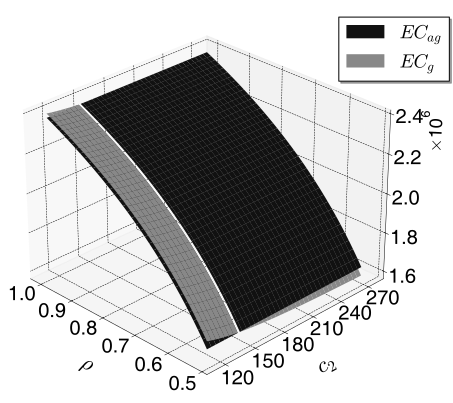

In [13]:
# Create the figure and axes objects
fig = plt.figure(figsize=(7, 5.5))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# Plot the surfaces
ax.plot_surface(X, Y, mainmodel_cost_g_max, color="#888888", shade=False)
ax.plot_surface(X, Y, benchmark_cost_g_max, color="#111111", shade=False)
ax.plot_surface(X, Y, mainmodel_cost_g_min, color="#888888", shade=False)
ax.plot_surface(X, Y, benchmark_cost_g_min, color="#111111", shade=False)

ax.invert_xaxis()
ax.set_xlabel("$\\rho$", size=22, labelpad=10)
ax.set_ylabel("$c_2$", size=22, labelpad=10)
ax.tick_params(labelsize=18)
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_major_locator(MultipleLocator(30))
ax.yaxis.set_minor_locator(MultipleLocator(30))
ax.zaxis.set_major_locator(MultipleLocator(200000))
ax.zaxis.get_offset_text().set(size=18)
z_formatter = ScalarFormatter(useOffset=None, useMathText=True, useLocale=2)
z_formatter.set_scientific(True)
z_formatter.set_powerlimits((-2, 2))
z_axis = ax.get_zaxis()
z_axis.set_major_formatter(z_formatter)

# show legend
colors = ["#111111", "#888888"]
legend_labels = ["$EC_{ag}$", "$EC_g$"]
legend_handles = [Rectangle((0, 0), 1, 1, fc=color) for color in colors]
ax.legend(
    handles=legend_handles,
    labels=legend_labels,
    fontsize=19,
    frameon=True,
    fancybox=False,
    shadow=True,
    edgecolor="black",
    loc="lower right",
    bbox_to_anchor=(1.15, 0.78),
)

plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
plt.setp(ax.get_zticklabels(), visible=False)

for x, text in zip(
    [0.5, 0.6, 0.7, 0.8, 0.9, 1.00], ["0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]
):
    ax.text(x=x, y=70, z=1560273.23, s=text, fontsize=20)

for y, text in zip(
    [100, 130, 160, 190, 220, 250],
    ["120", "150", "180", "210", "240", "270"],
):
    ax.text(x=0.44, y=y, z=1560273.23, s=text, fontsize=20)

for z, text in zip(
    [1630000, 1830000, 2030000, 2230000,2430000],
    ["1.6", "1.8", "2.0", "2.2","2.4"],
):
    ax.text(x=0.43, y=270, z=z, s=text, fontsize=20)

# # Set the view angle and display the plot
ax.view_init(elev=28, azim=-45)
plt.show()